In [112]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('sales_data.csv')

In [3]:
data.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [10]:
data.dtypes

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object

In [12]:
data.agg(
    {
        "price": ["count", "mean", "std", "min", "max"],
        "quantity": ["count", "mean", "std", "min", "max"],
        "revenue": ["count", "mean", "std", "min", "max"]
    }
)

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
max,1200.000000,50.000000,7200.000000


In [17]:
data.shape

(369, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


<h3> There is 3 coloumns with null values </h3>

In [27]:
missing_values_count = data.isnull().sum()
missing_values_count[0:6]

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

<h2> Data Cleaning </h2>

#### price column

In [14]:
data[data.price.isnull()]

,date,product,category,price,quantity,revenue
193,2022-07-11,Watch,Accessories,NaN,15.0,2250.0
320,2022-11-13,Wallet,Accessories,NaN,35.0,1050.0


In [28]:
data[(data == 'Watch').any(axis=1)].head(1)

,date,product,category,price,quantity,revenue
5,2022-01-05,Watch,Accessories,150.0,10.0,1500.0


In [29]:
data[(data == 'Wallet').any(axis=1)].head(1)

,date,product,category,price,quantity,revenue
15,2022-01-14,Wallet,Accessories,30.0,40.0,1200.0


In [32]:
data.at[193, 'price'] = 150.0
data.at[320, 'price'] = 35.0

In [34]:
data[data.price.isnull()]

,date,product,category,price,quantity,revenue


#### quantity column

In [15]:
data[data.quantity.isnull()]

,date,product,category,price,quantity,revenue
122,2022-05-01,Smartphone,Electronics,600.0,NaN,6600.0


In [36]:
data['quantity'] = data['quantity'].fillna(data['revenue'] / data['price'])

In [38]:
missing_values_count = data.isnull().sum()
missing_values_count[0:6]

date        0
product     0
category    0
price       0
quantity    0
revenue     1
dtype: int64

#### revenue column

In [16]:
data[data.revenue.isnull()]

,date,product,category,price,quantity,revenue
96,2022-04-05,Smartwatch,Accessories,200.0,10.0,NaN


In [39]:
data['revenue'] = data['revenue'].fillna(data['price'] * data['quantity'])

In [41]:
data[data.revenue.isnull()]

,date,product,category,price,quantity,revenue


In [42]:
print(f'Now the data have {data.isnull().any().sum()} columns with missing values.')

Now the data have 0 columns with missing values.



<h5>Making sure there is no wrong data format in the dataset by getting the number of rows containing the DataType equal to the number of the total rows in dataests</h5>

In [44]:
data.dtypes

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object

In [45]:
data.select_dtypes(include='object')

,date,product,category
0,2022-01-01,Smartphone,Electronics
1,2022-01-01,Laptop,Electronics
2,2022-01-02,T-Shirt,Clothing
3,2022-01-03,Headphones,Electronics
4,2022-01-04,T-Shirt,Clothing
...,...,...,...
364,2022-12-27,Watch,Accessories
365,2022-12-28,Coat,Clothing
366,2022-12-29,Headphones,Electronics
367,2022-12-30,Smartphone,Electronics


In [46]:
data.select_dtypes(include='float64')

,price,quantity,revenue
0,600.0,10.0,6000.0
1,1200.0,5.0,6000.0
2,20.0,50.0,1000.0
3,100.0,20.0,2000.0
4,20.0,25.0,500.0
...,...,...,...
364,150.0,5.0,750.0
365,100.0,5.0,500.0
366,100.0,10.0,1000.0
367,600.0,11.0,6600.0


<h5>Making sure there is no negative values</h5>

In [50]:
dataN=data[data['revenue']<0]
print(dataN)

Empty DataFrame
Columns: [date, product, category, price, quantity, revenue]
Index: []


In [51]:
dataN=data[data['quantity']<0]
print(dataN)

Empty DataFrame
Columns: [date, product, category, price, quantity, revenue]
Index: []


In [52]:
dataN=data[data['price']<0]
print(dataN)

Empty DataFrame
Columns: [date, product, category, price, quantity, revenue]
Index: []


## 1. the total revenue generated by the company over the course of the year 

In [53]:
total_revenue = data['revenue'].sum()
total_revenue

760330.0

## 2. Which product had the highest revenue?  How much revenue did it generate?

In [67]:
revenue_each_product = data.groupby('product')['revenue'].sum()
revenue_each_product

product
Backpack       20400.0
Coat           33800.0
Headphones     18000.0
Hoodie         21000.0
Jeans          20650.0
Laptop          6000.0
Smartphone    434400.0
Smartwatch     60800.0
Sneakers       21600.0
Speaker        39680.0
T-Shirt        20100.0
Tablet         18000.0
Wallet         13200.0
Watch          32700.0
Name: revenue, dtype: float64

In [68]:
revenue_each_product.max()

434400.0

### The product with the highest revenue is ***Smartphone***.</br>
### with revenue equal to **434400.0**
</br>

### Visualizing Total Revenue for each Product

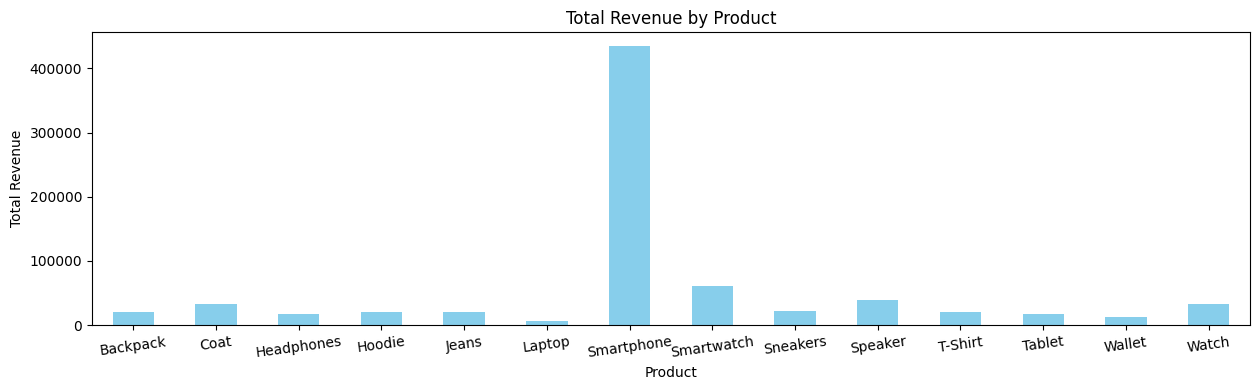

In [134]:
plt.figure(figsize=(12.7, 4))
revenue_each_product.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=7.7)
plt.tight_layout()
plt.show()

## 3. What was the average price of a product sold by the company?


In [80]:
average_price = data['price'].mean().round(3)
average_price

210.583

In [76]:
avg_each_product = data.groupby('product')['price'].mean().round(1)
avg_each_product

product
Backpack        50.0
Coat           100.0
Headphones     100.0
Hoodie          40.0
Jeans           50.0
Laptop        1200.0
Smartphone     600.0
Smartwatch     200.0
Sneakers        80.0
Speaker         80.0
T-Shirt         20.0
Tablet         400.0
Wallet          30.4
Watch          150.0
Name: price, dtype: float64

## 4. The total quantity of products sold by the company

In [81]:
data['quantity'].sum()

5371.0

## 5. Which category had the highest revenue? How much revenue did it generate?

In [82]:
catogory_data = data.groupby('category')['revenue'].sum()
catogory_data

category
Accessories    106700.0
Bags            19500.0
Bgas              900.0
Clohting         1200.0
Clothing        94350.0
Electronics    516080.0
Shoes           20640.0
Shoeses           960.0
Name: revenue, dtype: float64

In [83]:
catogory_data.max()

516080.0

### The category with the highest revenue is ***Electronics***.
### with revenue equal to **516080.0**
</br>

### Visualizing Total Revenue for each Category

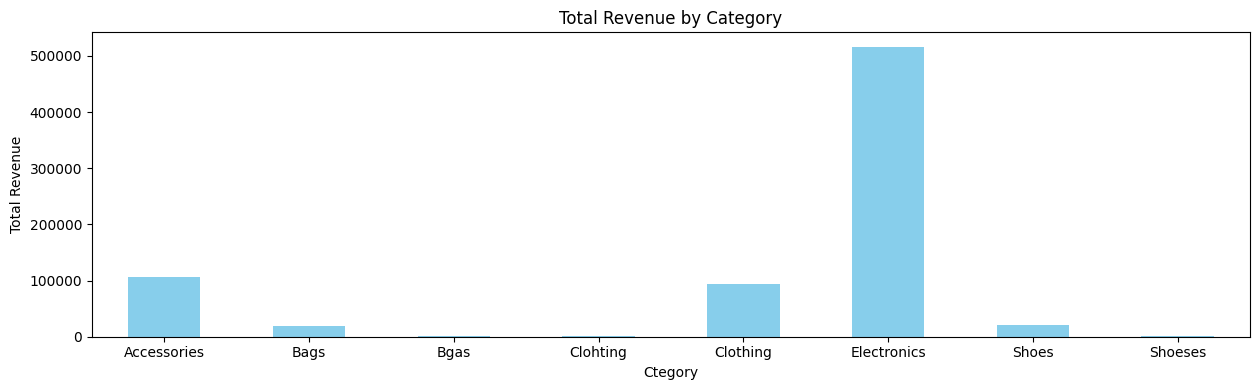

In [138]:
plt.figure(figsize=(12.7, 4))
catogory_data.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Category')
plt.xlabel('Ctegory')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 6. The average revenue per sale

In [88]:
data['revenue'].mean().round(3)

2060.515

## 7. What was the total revenue generated in each quarter of the year? 

In [99]:
data.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [95]:
data.dtypes

date         object
product      object
category     object
price       float64
quantity    float64
revenue     float64
dtype: object

In [100]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [101]:
data.head()

,date,product,category,price,quantity,revenue,month
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0,1
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0,1
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0,1
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0,1
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0,1


In [102]:
data_by_month = data.groupby('month')['revenue'].sum()
data_by_month

month
1     65800.0
2     53740.0
3     62560.0
4     57800.0
5     69510.0
6     58660.0
7     69510.0
8     65260.0
9     62910.0
10    66460.0
11    64110.0
12    64010.0
Name: revenue, dtype: float64

In [106]:
Q1 = (data_by_month[1]+data_by_month[2]+data_by_month[3])
Q2 = (data_by_month[4]+data_by_month[5]+data_by_month[6])
Q3 = (data_by_month[7]+data_by_month[8]+data_by_month[9])
Q4 = (data_by_month[10]+data_by_month[11]+data_by_month[12])

### The total revenue for each quarter of the year 

In [111]:
print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)
print("Q4:", Q4)

Q1: 182100.0
Q2: 185970.0
Q3: 197680.0
Q4: 194580.0


### Visualizing Total Revenue over The Year

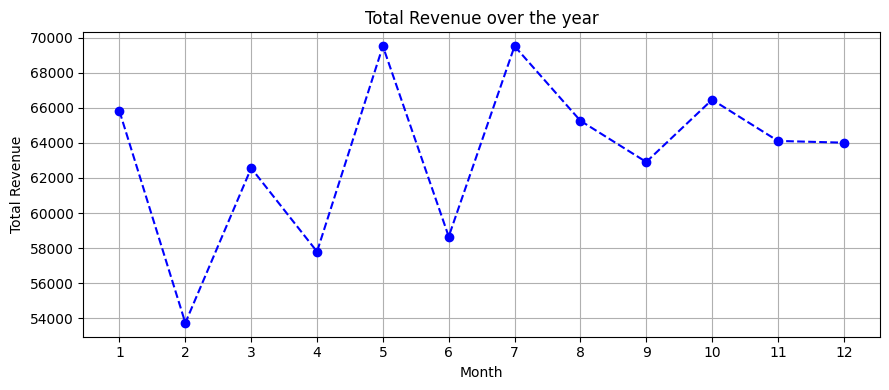

In [157]:
plt.figure(figsize=(9, 4))
plt.plot(data_by_month.index, data_by_month.values, marker='o', linestyle='--', color='blue')
plt.title('Total Revenue over the year')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(data_by_month.index)
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualizing Total Revenue by Quarter

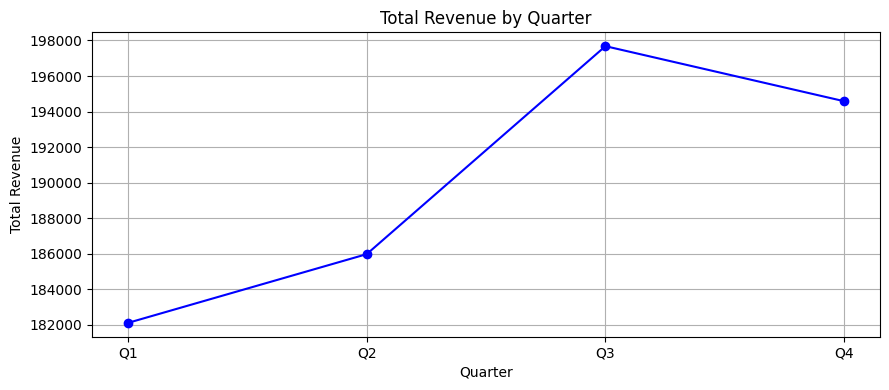

In [160]:
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
quarterly_revenue = [Q1, Q2, Q3, Q4]

plt.figure(figsize=(9, 4))
plt.plot(quarters, quarterly_revenue, marker='o', linestyle='-', color='blue')
plt.title('Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()